In [60]:
import os
import pandas as pd

database = 'Diabetes'


if database == 'CPU_SMALL':
    size_of_dataset = 8192	
elif database == 'abalone':
    size_of_dataset = 4177
elif database == 'Diabetes':
    size_of_dataset = 768
else:
    size_of_dataset = 4177

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'./{database}/plot/'


## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
compute_percent = lambda row: row[n_components_column] / size_of_dataset * 100
damping_formula = lambda accuracy, time : accuracy / time *100
damping_column = 'damping'
score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data[percent_column] = data.apply(compute_percent, axis=1)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

['Random_Fourier_features_and_SVC_Diabetes_cv_5.csv', 'Kernel_SVM_Diabetes_cv_5.csv', 'Kernel_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv']
Ridge files
['Kernel_ridge_classification_Diabetes_cv_5.csv', 'Nystrom_and_ridge_classification_Diabetes_cv_5.csv', 'Random_Fourier_features_and_ridge_classification_Diabetes_cv_5.csv']
SvM files
['Kernel_SVM_Diabetes_cv_5.csv', 'Nystrom_and_SVC_Diabetes_cv_5.csv', 'Random_Fourier_features_and_SVC_Diabetes_cv_5.csv']


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,damping,File
0,100.000000,768,0.766927,0.027406,0.020041,0.002526,0.779025,0.015613,3826.747086,Kernel_SVM_Diabetes_cv_5.csv
1,0.390625,3,0.677083,0.033954,0.007880,0.000431,0.715768,0.014820,8592.588110,Nystrom_and_SVC_Diabetes_cv_5.csv
2,0.911458,7,0.757812,0.009389,0.008817,0.001201,0.762616,0.007810,8594.536642,Nystrom_and_SVC_Diabetes_cv_5.csv
3,1.953125,15,0.766927,0.018552,0.009568,0.000766,0.774756,0.008590,8015.562367,Nystrom_and_SVC_Diabetes_cv_5.csv
4,3.906250,30,0.753906,0.019618,0.019251,0.005536,0.770405,0.009354,3916.291916,Nystrom_and_SVC_Diabetes_cv_5.csv
5,5.989583,46,0.776042,0.040511,0.029373,0.008074,0.776121,0.009729,2641.981852,Nystrom_and_SVC_Diabetes_cv_5.csv
6,7.942708,61,0.776042,0.025248,0.030800,0.013447,0.774764,0.006542,2519.602406,Nystrom_and_SVC_Diabetes_cv_5.csv
7,9.895833,76,0.770833,0.023582,0.030713,0.005086,0.778606,0.013710,2509.763982,Nystrom_and_SVC_Diabetes_cv_5.csv
8,13.932292,107,0.774740,0.019269,0.038340,0.011578,0.772485,0.008786,2020.697239,Nystrom_and_SVC_Diabetes_cv_5.csv
9,15.885417,122,0.773438,0.033043,0.047160,0.010063,0.771672,0.008188,1640.013094,Nystrom_and_SVC_Diabetes_cv_5.csv


In [61]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [62]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
24,Random_Fourier_features_and_ridge_classificati...,25.000,0.776,192
15,Random_Fourier_features_and_ridge_classificati...,1.953,0.776,15
6,Nystrom_and_ridge_classification_Diabetes_cv_5...,7.943,0.776,61
23,Random_Fourier_features_and_ridge_classificati...,19.922,0.775,153
20,Random_Fourier_features_and_ridge_classificati...,13.932,0.770,107
11,Nystrom_and_ridge_classification_Diabetes_cv_5...,19.922,0.770,153
16,Random_Fourier_features_and_ridge_classificati...,3.906,0.770,30
3,Nystrom_and_ridge_classification_Diabetes_cv_5...,1.953,0.768,15
5,Nystrom_and_ridge_classification_Diabetes_cv_5...,5.990,0.768,46
7,Nystrom_and_ridge_classification_Diabetes_cv_5...,9.896,0.768,76


# Damping

In [63]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
14,Random_Fourier_features_and_ridge_classificati...,0.911,25103.472,7
15,Random_Fourier_features_and_ridge_classificati...,1.953,23095.841,15
2,Nystrom_and_ridge_classification_Diabetes_cv_5...,0.911,20750.586,7
3,Nystrom_and_ridge_classification_Diabetes_cv_5...,1.953,20147.796,15
13,Random_Fourier_features_and_ridge_classificati...,0.391,19492.189,3
16,Random_Fourier_features_and_ridge_classificati...,3.906,18527.606,30
1,Nystrom_and_ridge_classification_Diabetes_cv_5...,0.391,17630.461,3
17,Random_Fourier_features_and_ridge_classificati...,5.990,15115.041,46
4,Nystrom_and_ridge_classification_Diabetes_cv_5...,3.906,12842.642,30
18,Random_Fourier_features_and_ridge_classificati...,7.943,8233.710,61


# Plotting 
## Ridge

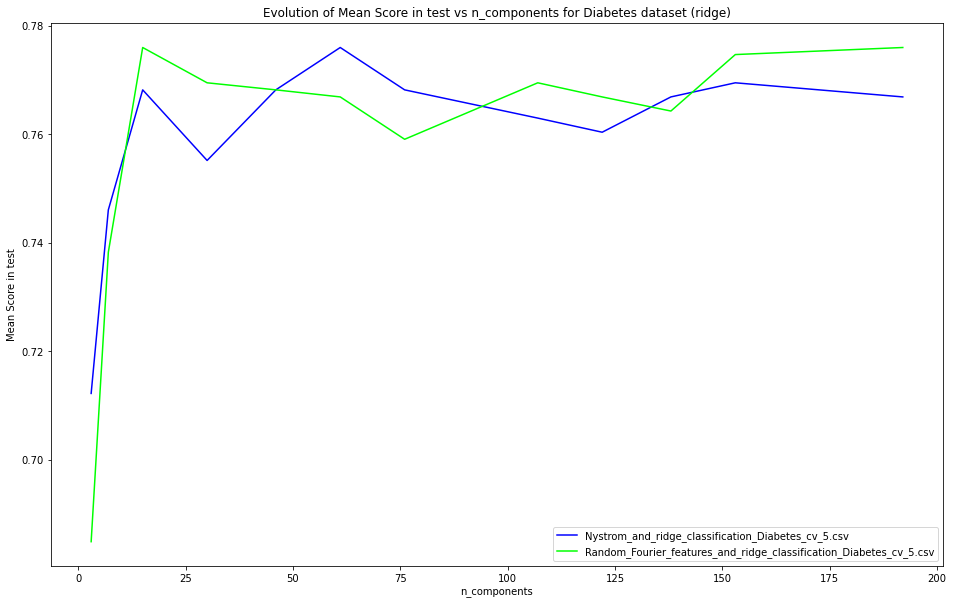

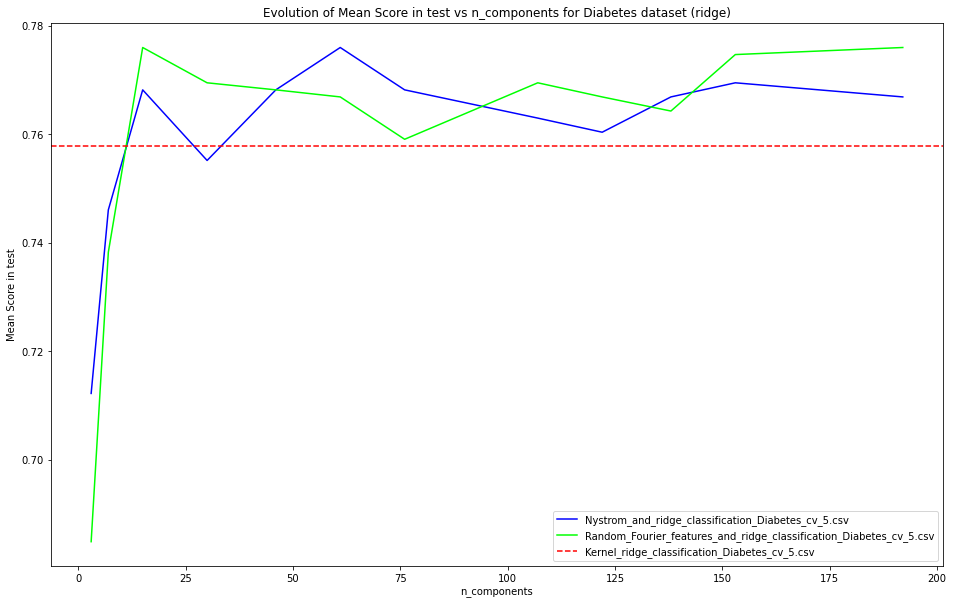

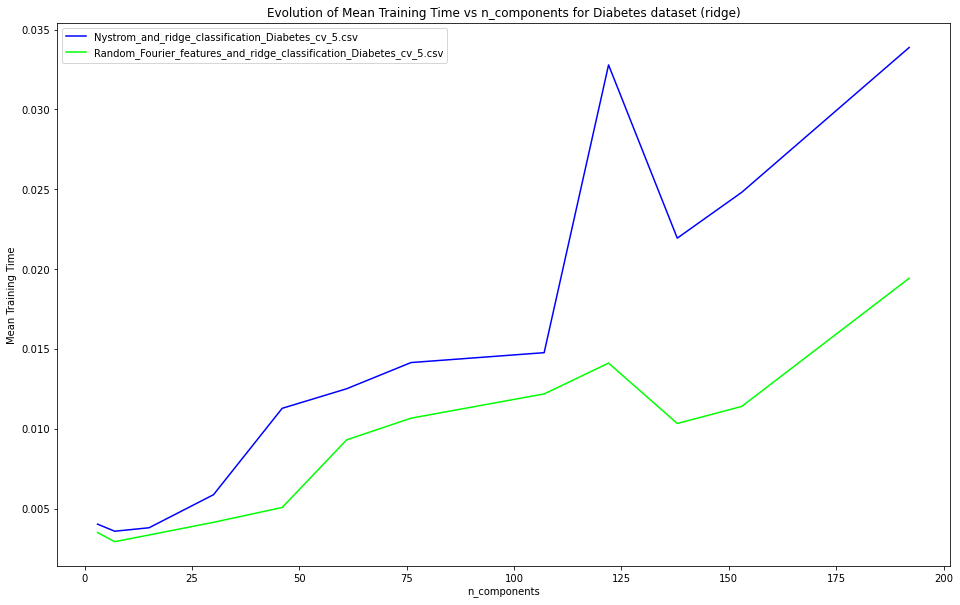

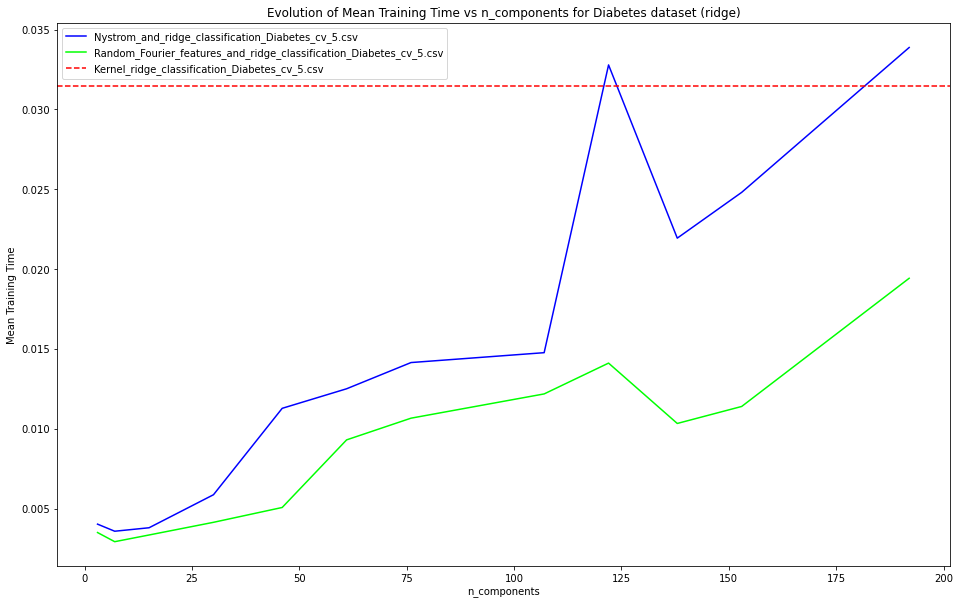

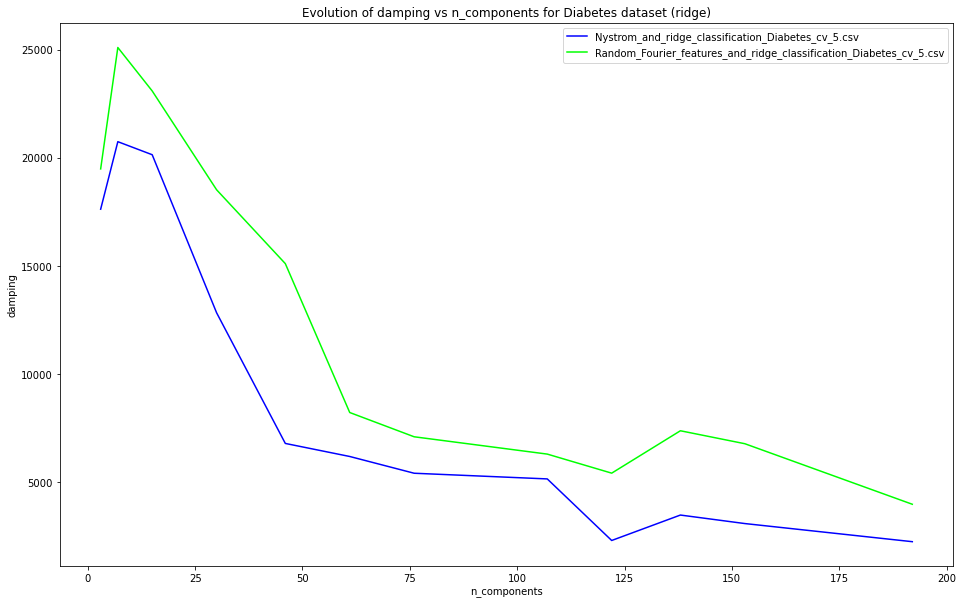

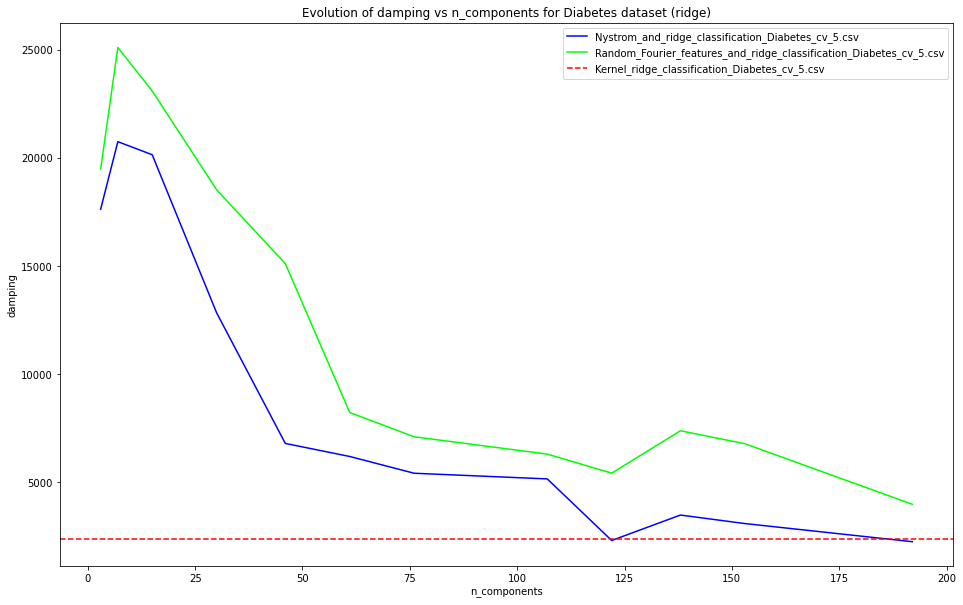

In [64]:
from plotting import view_plots_and_save_them


columns = [score_column, time_column, damping_column ]
  
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names, type ='ridge',
                          columns=columns, database=database, plot_path = plot_path)

## SVM 

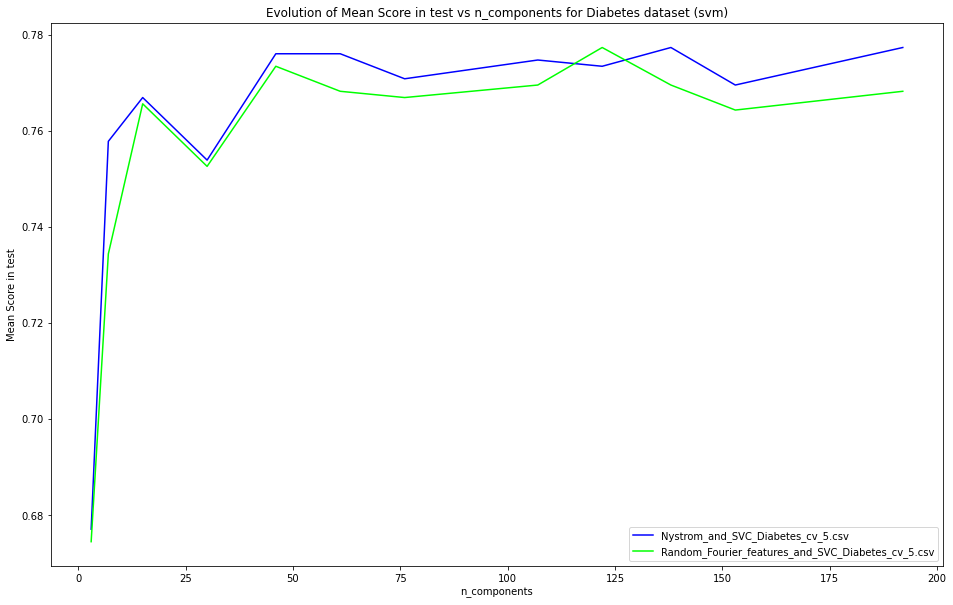

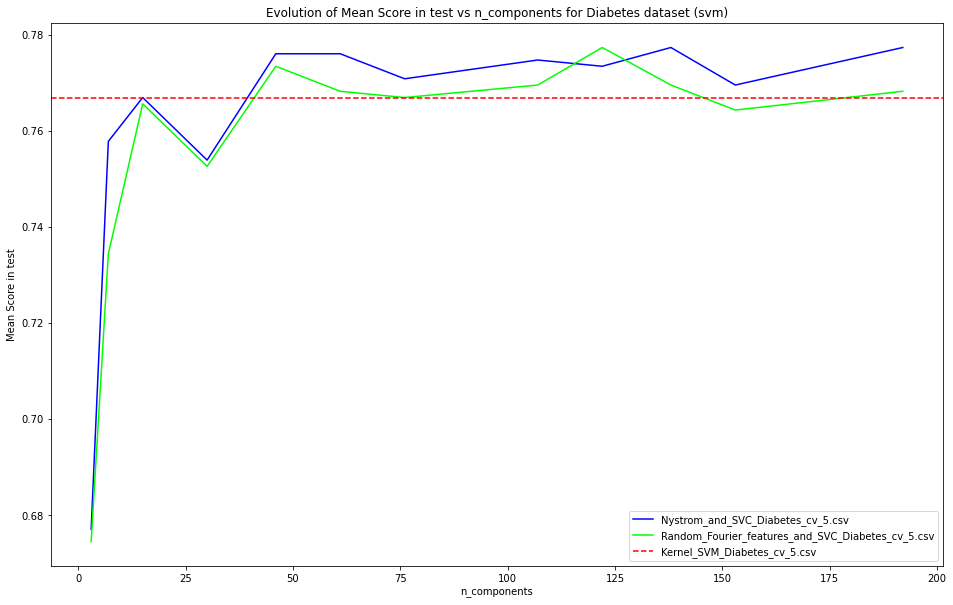

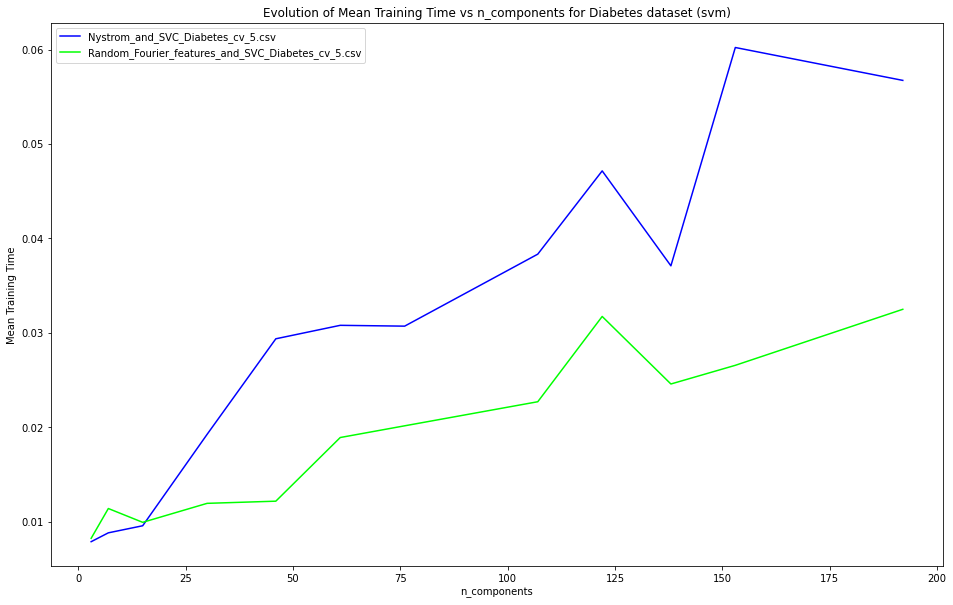

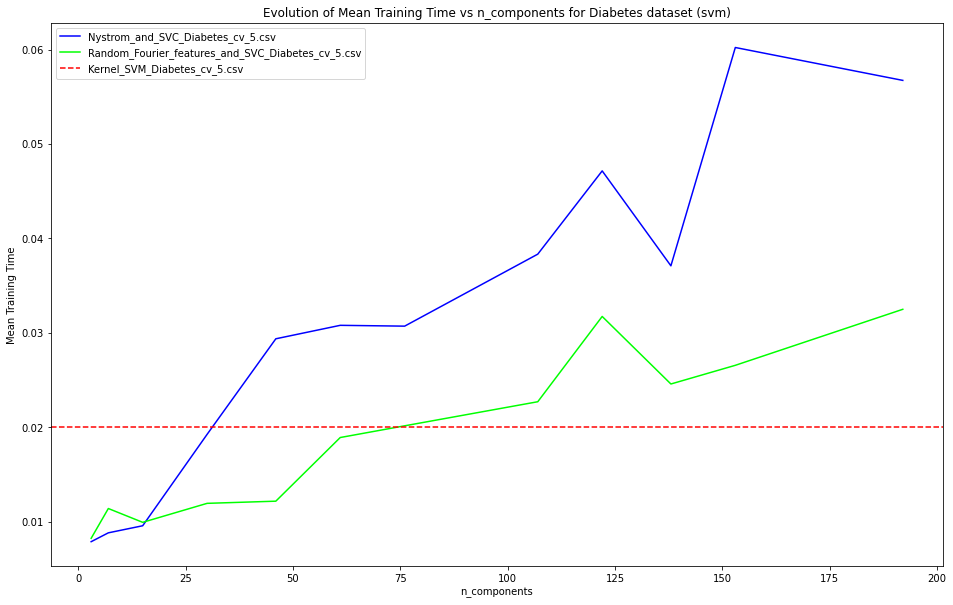

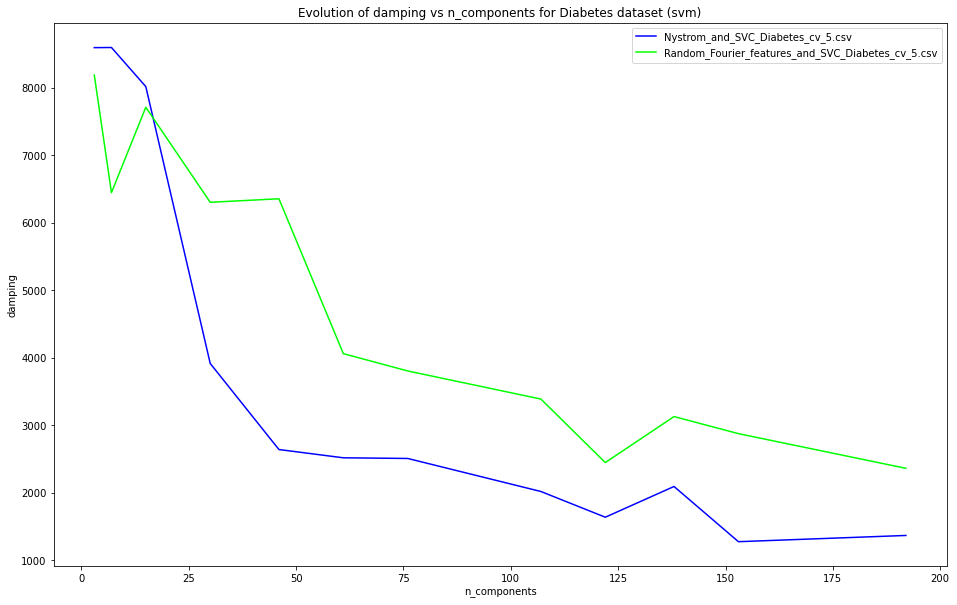

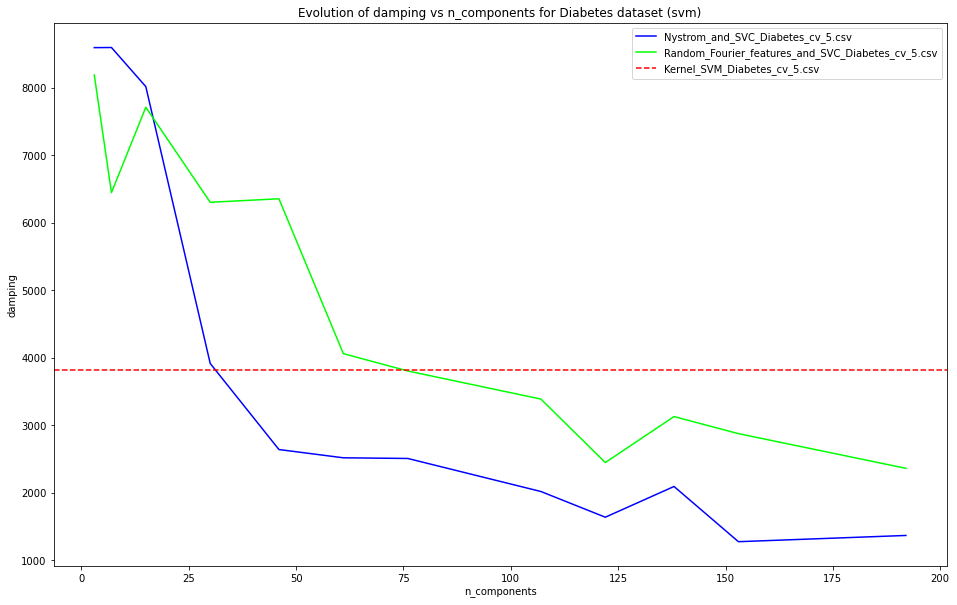

In [65]:
view_plots_and_save_them(df_list = svm_list, df_list_names=svm_list_names, type ='svm',
                          columns=columns, database=database, plot_path = plot_path)

# Hyperparameter

In [66]:
show_verbose(svm_data_verbose, n_rows = 20)

,Best Parameters,File,percent,n_components
0,"{'kernel_svm__C': 1.0, 'kernel_svm__gamma': 0.015625}",Kernel_SVM_Diabetes_cv_5.csv,100.000,768
2,"{'kernel_svm__C': 1.0, 'kernel_svm__gamma': 0.015625}",Kernel_SVM_Diabetes_cv_5.csv,100.000,768
3,"{'kernel_svm__C': 10000.0, 'kernel_svm__gamma': 0.0001220703125}",Kernel_SVM_Diabetes_cv_5.csv,100.000,768
1,"{'kernel_svm__C': 10.0, 'kernel_svm__gamma': 0.0013810679320049757}",Kernel_SVM_Diabetes_cv_5.csv,100.000,768
48,"{'nystroem__gamma': 0.0013810679320049757, 'svm__C': 100.0}",Nystrom_and_SVC_Diabetes_cv_5.csv,25.000,192
...,...,...,...,...
7,"{'nystroem__gamma': 0.0001220703125, 'svm__C': 100.0}",Nystrom_and_SVC_Diabetes_cv_5.csv,0.391,3
6,"{'nystroem__gamma': 0.0001220703125, 'svm__C': 100.0}",Nystrom_and_SVC_Diabetes_cv_5.csv,0.391,3
5,"{'nystroem__gamma': 0.0001220703125, 'svm__C': 100.0}",Nystrom_and_SVC_Diabetes_cv_5.csv,0.391,3
4,"{'nystroem__gamma': 0.015625, 'svm__C': 3.1622776601683795}",Nystrom_and_SVC_Diabetes_cv_5.csv,0.391,3
